In [179]:
from grover_num_list_cirq import find_num
from qiskit.tools.visualization import plot_histogram
from backend_operation import run_simulator, get_transpiled_circuits_of_circuit, get_fake_backend_list

In [139]:
import random
import timeit
import matplotlib.colors as mcolors

In [184]:
block_diagram = False
qc_size = 4

In [186]:
min_value = 5
max_value = 15
win = random.sample(range(min_value, max_value),1)
print(win)

[8]


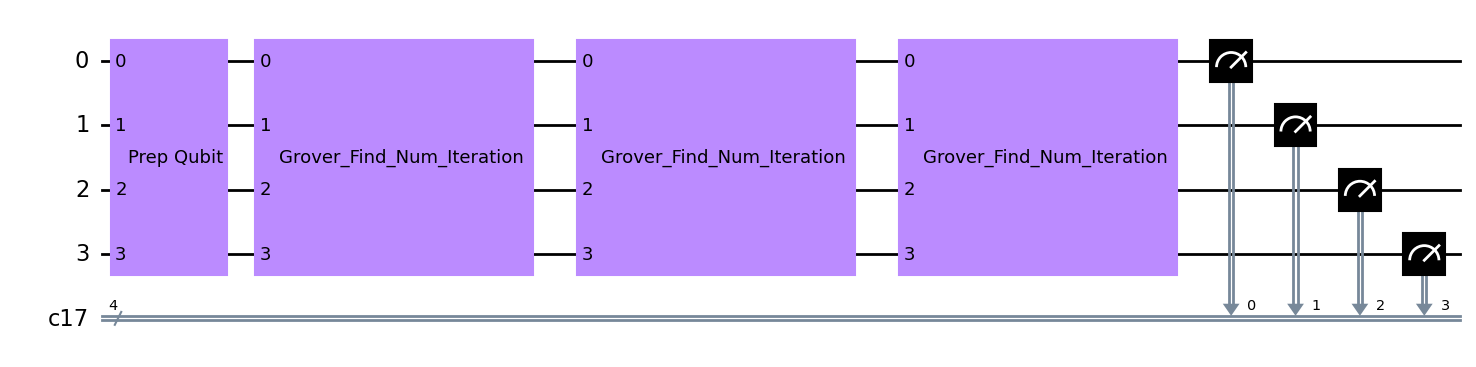

In [188]:
grover_find_value_win_size = find_num()
grover_find_value_win_size.build_iteration(win, block_diagram=block_diagram)
grover_find_value_win_size.create_grover(block_diagram=block_diagram, solutions=len(list(win)))
experiments = grover_find_value_win_size.measure_qc

experiments[0].draw('mpl')

In [171]:
fake_backed_name = 'FakeAuckland' #random.sample(get_fake_backend_list(min_qubit=len(experiments[0].qubits), max_qubit=len(experiments[0].qubits) + 10),1)[0][0]

In [172]:
transpiled_qc_list = get_transpiled_circuits_of_circuit(experiments[0], ['Aer', fake_backed_name], 
                                                   [None, 'Full_Range'],
                                                   optimization_level_list=[0,3])

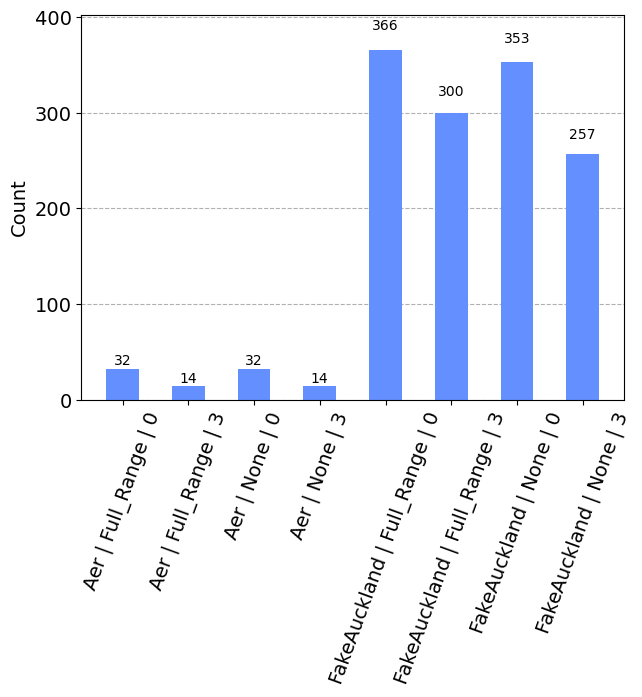

In [173]:
plot_histogram({
    qc.name : qc.depth()
    for qc in transpiled_qc_list
})

c:\Users\User\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


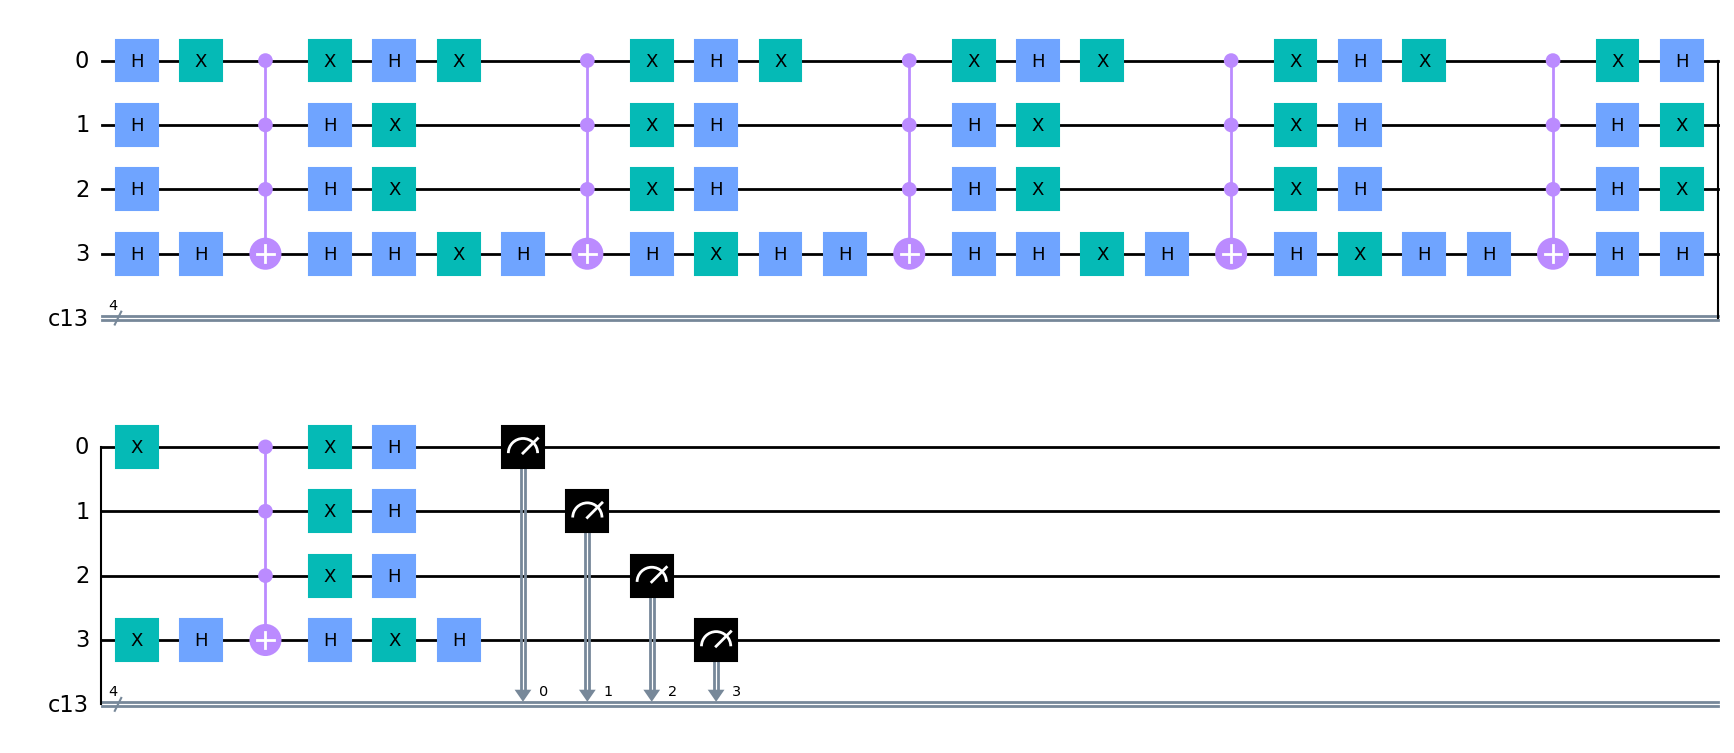

In [174]:
transpiled_qc_list[0].draw('mpl')

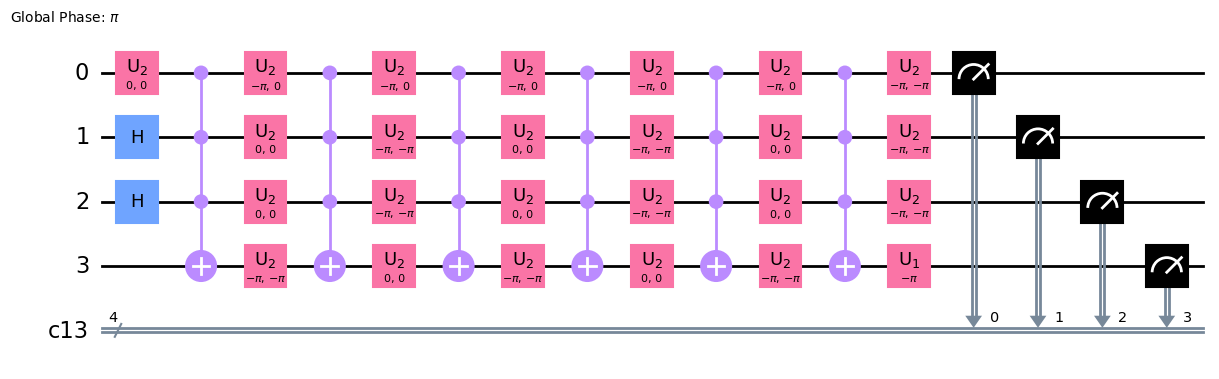

In [175]:
transpiled_qc_list[1].draw('mpl')

In [178]:
transpiled_qc_list[4].draw('mpl')

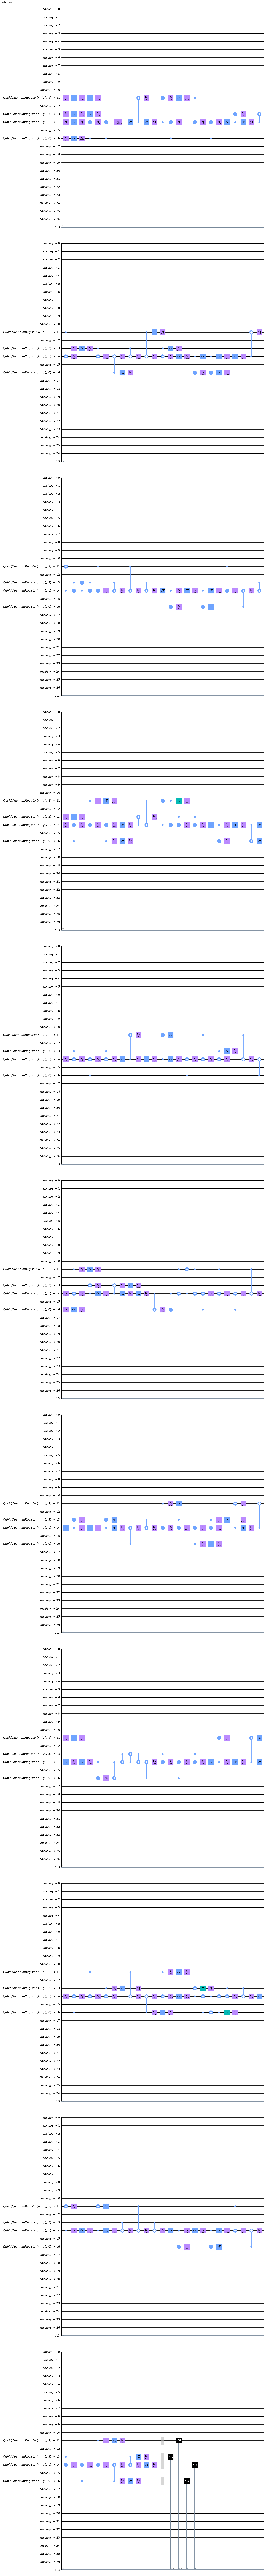

In [176]:
transpiled_qc_list[5].draw('mpl')

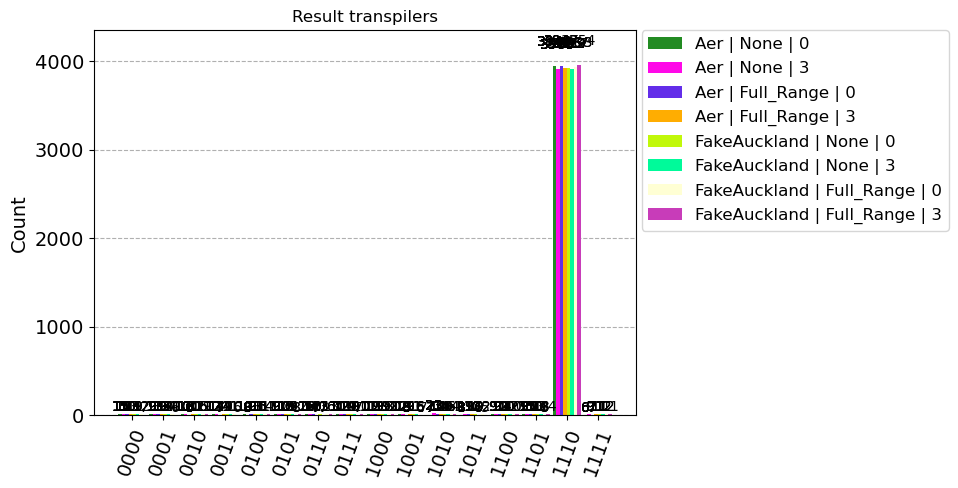

In [177]:
plot_histogram([run_simulator(qc,shots = 1024 * 4).get_counts() for qc in transpiled_qc_list], 
               legend=[qc.name for qc in transpiled_qc_list], color=list(random.choices(list(mcolors.get_named_colors_mapping().values()), k = len(transpiled_qc_list))),
               title="Result transpilers")

In [150]:
grover_find_value = find_num()
grover_find_value.build_iteration(win, block_diagram=block_diagram, data = qc_size)
grover_find_value.create_grover(block_diagram=block_diagram, solutions=len(list(win)))
experiments = grover_find_value.measure_qc
print(experiments)
#experiments[0].draw('mpl')

In [151]:
fake_backed_name = 'FakeAuckland' #random.sample(get_fake_backend_list(min_qubit=len(experiments[0].qubits), max_qubit=len(experiments[0].qubits) + 10),1)[0][0]

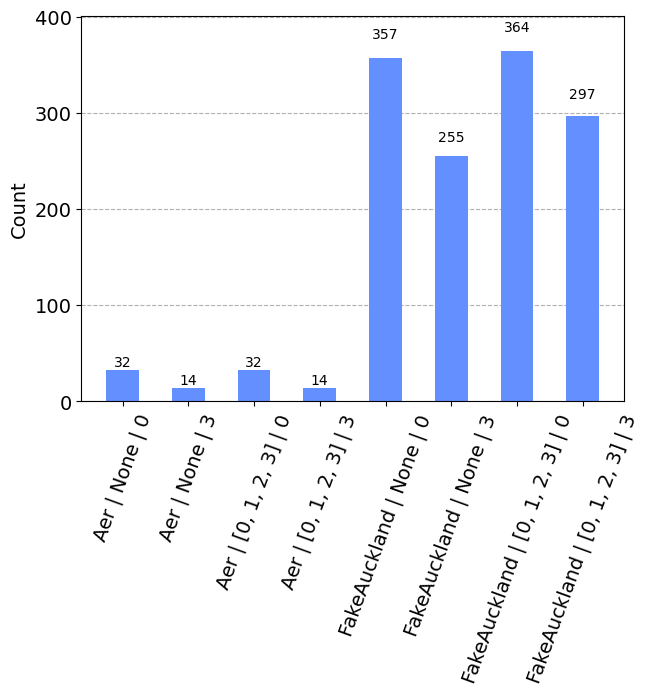

In [152]:
transpiled_qc_list = get_transpiled_circuits_of_circuit(experiments[0], ['Aer', fake_backed_name], 
                                                   [None, list(range(len(experiments[0].qubits)))],
                                                   optimization_level_list=[0,3])
plot_histogram({
    qc.name : qc.depth()
    for qc in transpiled_qc_list
})

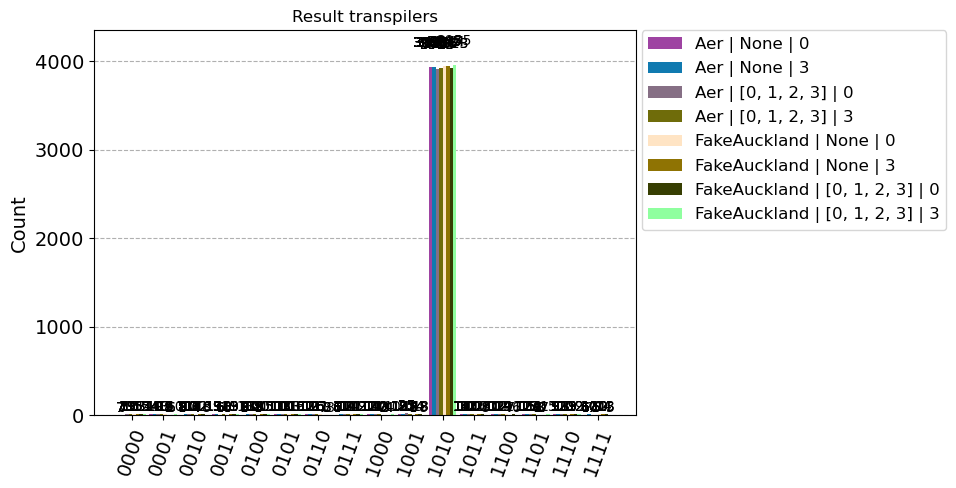

In [153]:
plot_histogram([run_simulator(qc, shots = 1024 * 4).get_counts() for qc in transpiled_qc_list], 
               legend=[qc.name for qc in transpiled_qc_list], color=list(random.choices(list(mcolors.get_named_colors_mapping().values()), k = len(transpiled_qc_list))),
               title="Result transpilers")

In [154]:
num_list_num = 5
data_arr = list(range(num_list_num))
random.shuffle(data_arr)
win = random.sample(data_arr, 1)

print(f"Data array: {data_arr} , the winner: {win}")

Data array: [1, 3, 4, 2, 0] , the winner: [3]


In [155]:
st = timeit.default_timer()
sol = []
for i, val in enumerate(data_arr):
    if val in win:
        sol.append(i)
        
end = timeit.default_timer()
print(f"Time: {end - st} , solution : {sol}")

Time: 0.00023040000814944506 , solution : [1]


In [156]:
grover_find_value_list = find_num()
grover_find_value_list.build_iteration(win, block_diagram=block_diagram, data = data_arr)
grover_find_value_list.create_grover(block_diagram=block_diagram, solutions=len(list(win)))
experiments = grover_find_value_list.measure_qc
print(experiments)
#experiments[0].draw('mpl')

In [157]:
fake_backed_name = 'FakeAuckland' #random.sample(get_fake_backend_list(min_qubit=len(experiments[0].qubits), max_qubit=len(experiments[0].qubits) + 10),1)[0][0]

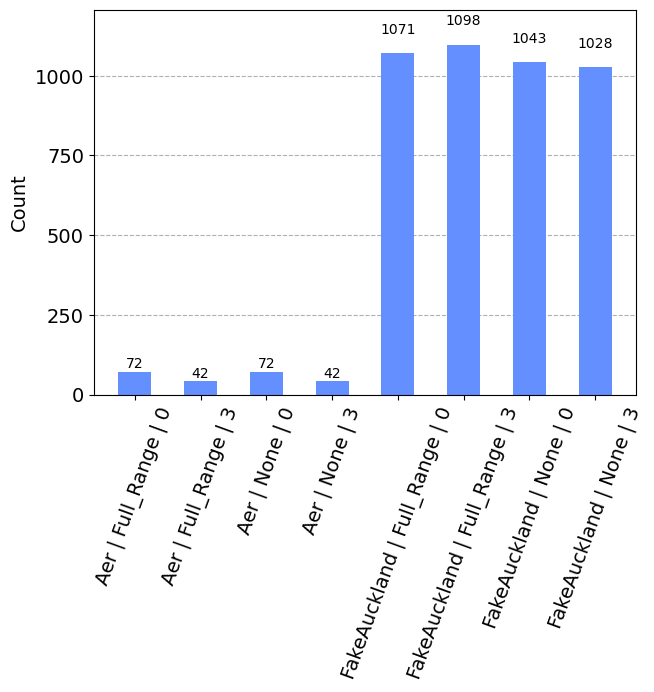

In [158]:
transpiled_qc_list = get_transpiled_circuits_of_circuit(experiments[0], ['Aer', fake_backed_name], 
                                                   [None, 'Full_Range'],
                                                   optimization_level_list=[0,3])
plot_histogram({
    qc.name : qc.depth()
    for qc in transpiled_qc_list
})

In [159]:
qc_result = [run_simulator(qc, shots = 1024 * 4) for qc in transpiled_qc_list]

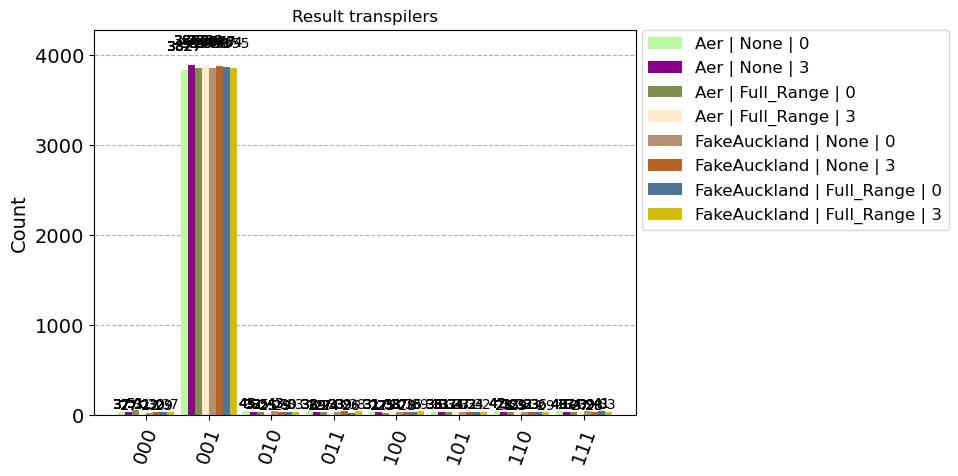

In [160]:
plot_histogram([qc.get_counts() for qc in qc_result], 
               legend=[qc.name for qc in transpiled_qc_list], color=list(random.choices(list(mcolors.get_named_colors_mapping().values()), k = len(transpiled_qc_list))),
               title="Result transpilers")

In [161]:
[{qc.name : result.time_taken} for result, qc in zip(qc_result, transpiled_qc_list)]

[{'Aer | None | 0': 0.012978315353393555},
 {'Aer | None | 3': 0.01291203498840332},
 {'Aer | Full_Range | 0': 0.010935306549072266},
 {'Aer | Full_Range | 3': 0.01097416877746582},
 {'FakeAuckland | None | 0': 0.037897586822509766},
 {'FakeAuckland | None | 3': 0.03593897819519043},
 {'FakeAuckland | Full_Range | 0': 0.028964996337890625},
 {'FakeAuckland | Full_Range | 3': 0.028964757919311523}]

In [162]:
for qc in transpiled_qc_list:
    print(qc.qubits)

[Qubit(QuantumRegister(3, 'index'), 0), Qubit(QuantumRegister(3, 'index'), 1), Qubit(QuantumRegister(3, 'index'), 2), AncillaQubit(AncillaRegister(3, 'data'), 0), AncillaQubit(AncillaRegister(3, 'data'), 1), AncillaQubit(AncillaRegister(3, 'data'), 2)]
[Qubit(QuantumRegister(3, 'index'), 0), Qubit(QuantumRegister(3, 'index'), 1), Qubit(QuantumRegister(3, 'index'), 2), AncillaQubit(AncillaRegister(3, 'data'), 0), AncillaQubit(AncillaRegister(3, 'data'), 1), AncillaQubit(AncillaRegister(3, 'data'), 2)]
[Qubit(QuantumRegister(6, 'q'), 0), Qubit(QuantumRegister(6, 'q'), 1), Qubit(QuantumRegister(6, 'q'), 2), Qubit(QuantumRegister(6, 'q'), 3), Qubit(QuantumRegister(6, 'q'), 4), Qubit(QuantumRegister(6, 'q'), 5)]
[Qubit(QuantumRegister(6, 'q'), 0), Qubit(QuantumRegister(6, 'q'), 1), Qubit(QuantumRegister(6, 'q'), 2), Qubit(QuantumRegister(6, 'q'), 3), Qubit(QuantumRegister(6, 'q'), 4), Qubit(QuantumRegister(6, 'q'), 5)]
[Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1),

In [163]:
#transpiled_qc_list[7].draw('mpl')

c:\Users\User\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


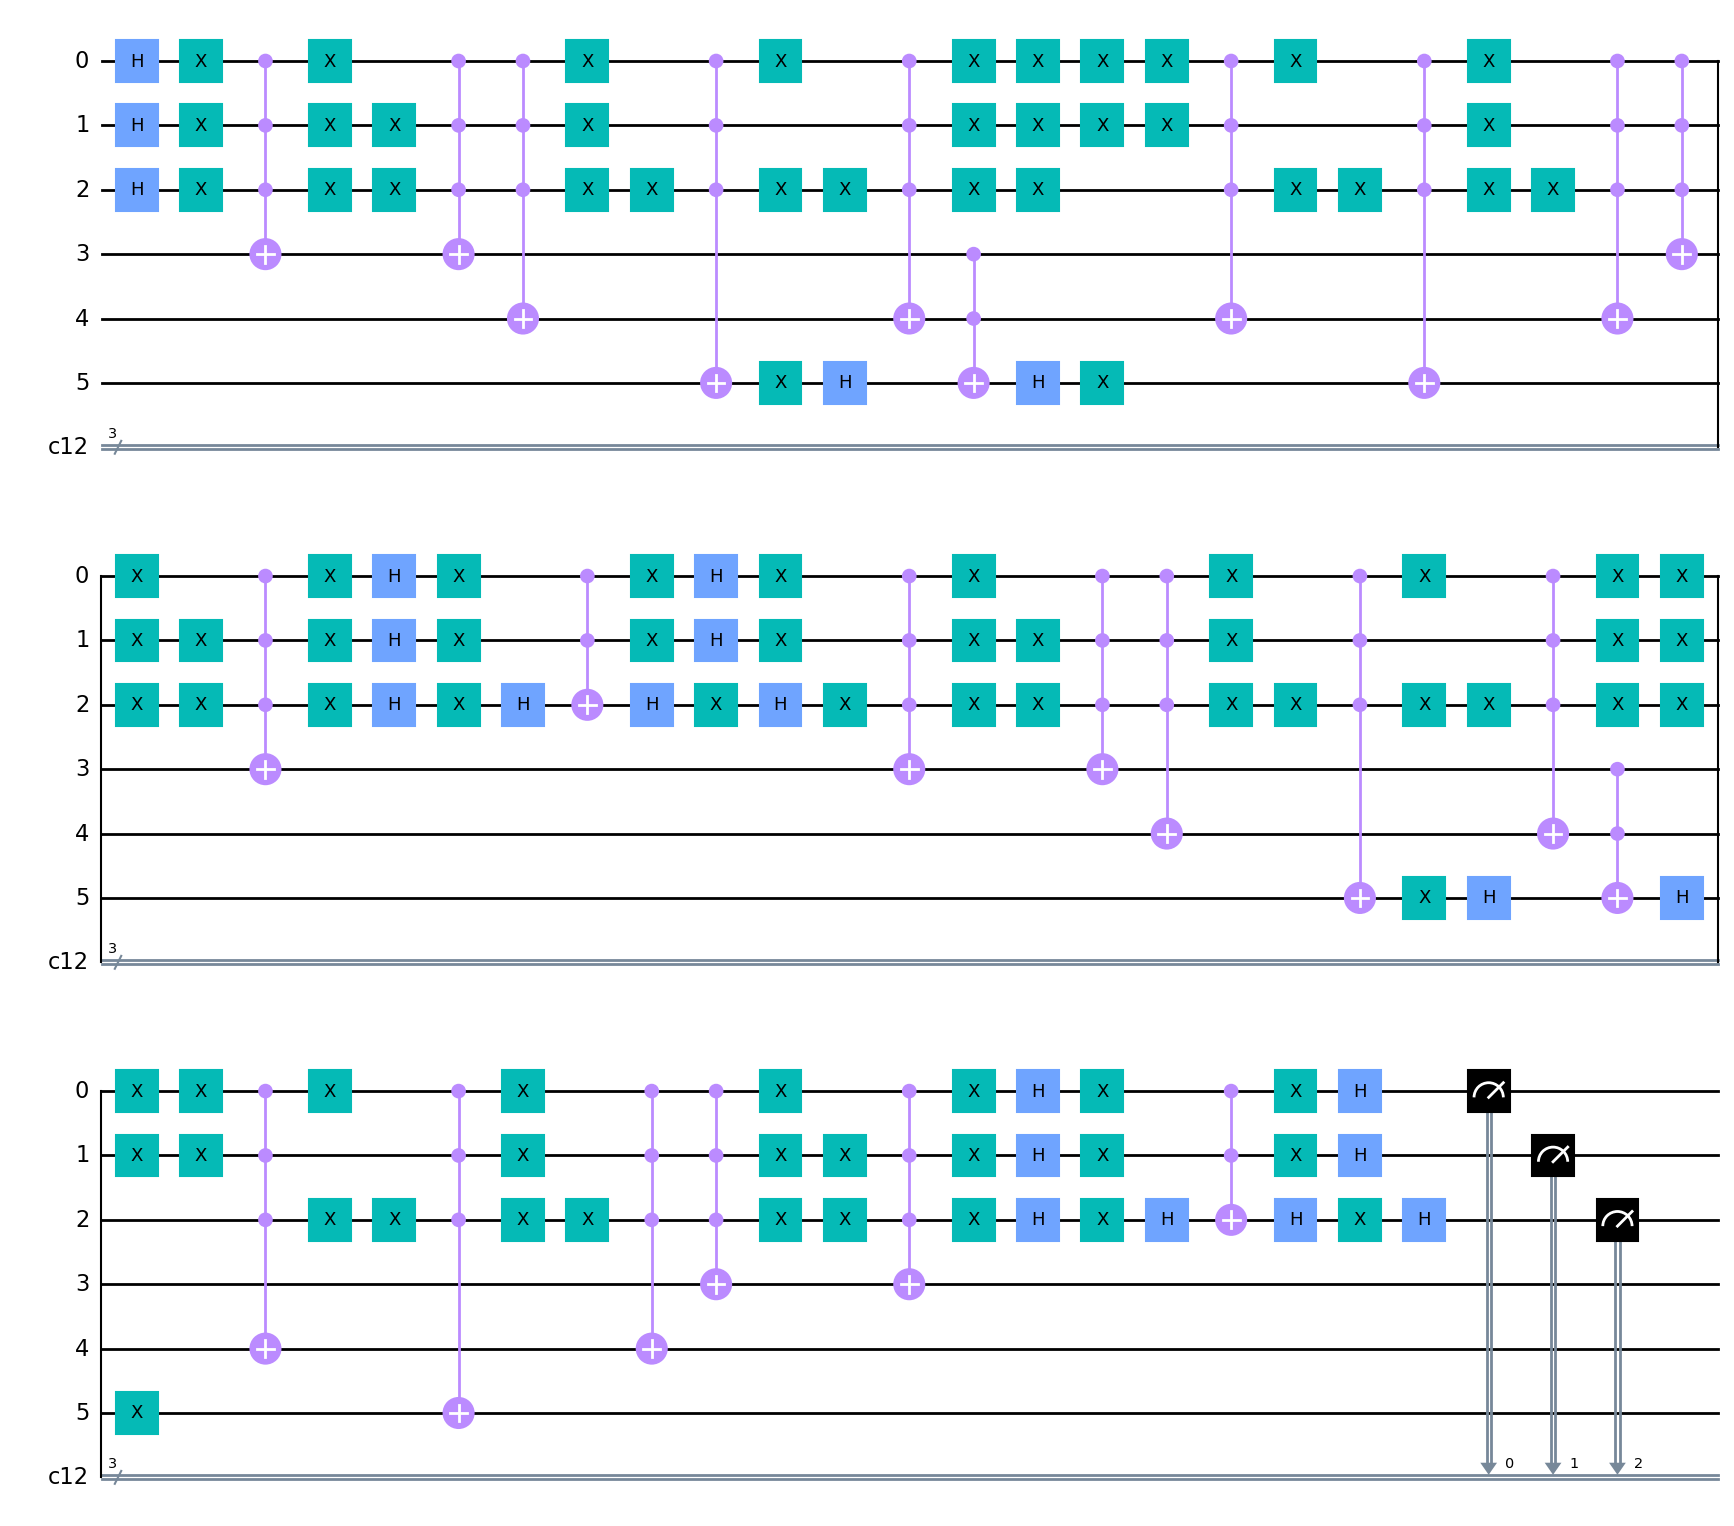

In [164]:
transpiled_qc_list[0].draw('mpl')

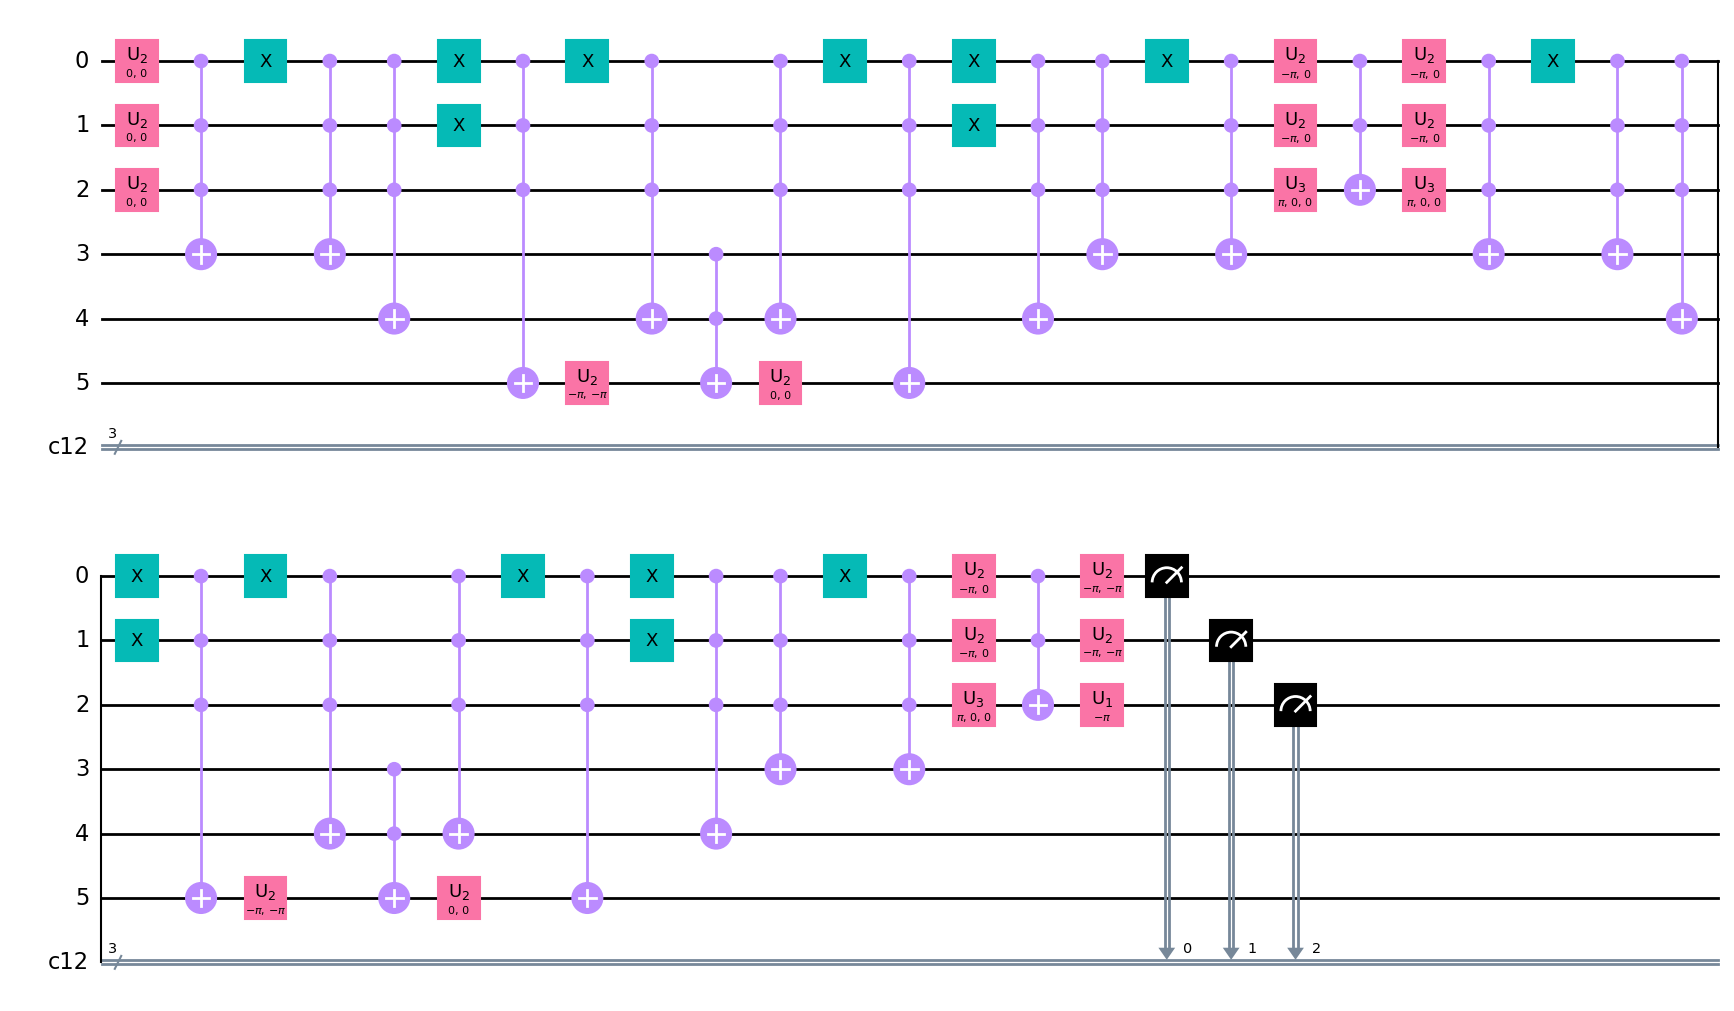

In [165]:
transpiled_qc_list[1].draw('mpl')

In [166]:
transpiled_qc_list[5].draw('mpl')

ValueError: Image size of 2836x101788 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2836.12x101788 with 1 Axes>